In [1]:
%pip install matplotlib
%pip install scipy
%pip install pandas
%pip install lifelines matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from scipy import stats
from io import StringIO
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test

# Get all the files in the directory
all_files = glob.glob("./csv/*.csv")

# 创建一个空的字典来存储每个DataFrame
df_dict = {}

# 遍历所有文件并读取它们
for filename in all_files:
    df_name = os.path.basename(filename).split(".")[0]  # 使用文件名作为DataFrame的键
    df_dict[df_name] = pd.read_csv(filename)

# 打印所有DataFrame的名称
for name, df in df_dict.items():
    print(f"DataFrame: {name}")

# 从字典中提取特定的DataFrame
df_conformant_log_hierarchical = df_dict['conformant_log_hierarchical']
# print(df_conformant_log_hierarchical.head())
df_fitting_log_and = df_dict['fitting_log_and']
# print(df_fitting_log_and.head())
df_non_conformant_log_hierarchical = df_dict['non_conformant_log_hierarchical']
# print(df_non_conformant_log_hierarchical.head())
df_non_fitting_log_and = df_dict['non_fitting_log_and']
print(df_non_fitting_log_and.head())

DataFrame: conformant_log_hierarchical
DataFrame: fitting_log_and
DataFrame: non_conformant_log_hierarchical
DataFrame: non_fitting_log_and
      Case ID Activity                         Resource  \
0  STNR000001    Start                            Start   
1  STNR000001  41030-1  Design og innovation, ing.bach.   
2  STNR000001    88383  Design og innovation, ing.bach.   
3  STNR000001    42062  Design og innovation, ing.bach.   
4  STNR000001   B41-15  Design og innovation, ing.bach.   

        Complete Timestamp     Variant  Variant index lifecycle:transition  \
0  2017-07-07 02:00:00.000  Variant 93             93             complete   
1  2017-07-07 02:00:00.000  Variant 93             93             complete   
2  2018-01-23 01:00:00.000  Variant 93             93             complete   
3  2018-05-31 02:00:00.000  Variant 93             93             complete   
4  2018-06-11 02:00:00.000  Variant 93             93             complete   

                           Program C

In [3]:
# 提取每个学生的开始和结束时间
start_times = df_fitting_log_and[df_fitting_log_and['Activity'] == 'Start'].set_index('Case ID')['Complete Timestamp']
end_times = df_fitting_log_and[df_fitting_log_and['Activity'] == 'End'].set_index('Case ID')['Complete Timestamp']

# 合并开始和结束时间到一个DataFrame中
student_times = pd.DataFrame({'Start': start_times, 'End': end_times})

# 将字符串转换为日期时间格式
student_times['Start'] = pd.to_datetime(student_times['Start'])
student_times['End'] = pd.to_datetime(student_times['End'])

# 计算每个学生的总的教育时长
student_times['Duration'] = student_times['End'] - student_times['Start']

print(student_times)

                         Start                 End           Duration
Case ID                                                              
STNR000002 2018-01-23 01:00:00 2018-01-23 01:00:00    0 days 00:00:00
STNR000008 2017-12-22 01:00:00 2021-09-13 02:00:00 1361 days 01:00:00
STNR000009 2017-12-22 01:00:00 2021-09-13 02:00:00 1361 days 01:00:00
STNR000010 2017-12-22 01:00:00 2021-08-13 02:00:00 1330 days 01:00:00
STNR000027 2017-09-18 02:00:00 2020-09-11 02:00:00 1089 days 00:00:00
...                        ...                 ...                ...
STNR009994 2017-08-10 02:00:00 2017-08-10 02:00:00    0 days 00:00:00
STNR009997 2017-07-06 02:00:00 2018-06-27 02:00:00  356 days 00:00:00
STNR009998 2017-07-05 02:00:00 2018-08-15 02:00:00  406 days 00:00:00
STNR009999 2017-07-06 02:00:00 2018-09-21 02:00:00  442 days 00:00:00
STNR010001 2017-07-07 02:00:00 2020-02-11 01:00:00  948 days 23:00:00

[2781 rows x 3 columns]


In [4]:
# 提取每个学生的开始和结束时间
start_times = df_non_fitting_log_and[df_non_fitting_log_and['Activity'] == 'Start'].set_index('Case ID')['Complete Timestamp']
end_times = df_non_fitting_log_and[df_non_fitting_log_and['Activity'] == 'End'].set_index('Case ID')['Complete Timestamp']

# 合并开始和结束时间到一个DataFrame中
student_non_times = pd.DataFrame({'Start': start_times, 'End': end_times})

# 将字符串转换为日期时间格式
student_non_times['Start'] = pd.to_datetime(student_non_times['Start'])
student_non_times['End'] = pd.to_datetime(student_non_times['End'])

# 计算每个学生的总的教育时长
student_non_times['Duration'] = student_non_times['End'] - student_non_times['Start']

print(student_non_times)

                         Start                 End           Duration
Case ID                                                              
STNR000001 2017-07-07 02:00:00 2021-02-08 01:00:00 1311 days 23:00:00
STNR000003 2017-12-15 01:00:00 2021-07-02 02:00:00 1295 days 01:00:00
STNR000004 2018-02-15 01:00:00 2021-06-29 02:00:00 1230 days 01:00:00
STNR000005 2017-09-11 02:00:00 2021-06-29 02:00:00 1387 days 00:00:00
STNR000006 2017-11-14 01:00:00 2021-06-24 02:00:00 1318 days 01:00:00
...                        ...                 ...                ...
STNR010004 2017-08-21 02:00:00 2021-04-13 02:00:00 1331 days 00:00:00
STNR010005 2017-07-07 02:00:00 2020-03-09 01:00:00  975 days 23:00:00
STNR010006 2017-08-15 02:00:00 2021-08-08 02:00:00 1454 days 00:00:00
STNR010007 2019-12-13 01:00:00 2021-07-09 02:00:00  574 days 01:00:00
STNR010008 2017-08-21 02:00:00 2019-09-16 02:00:00  756 days 00:00:00

[6051 rows x 3 columns]


In [5]:
# 过滤掉 Duration 为 0 的学生数据
student_times = student_times[student_times['Duration'] != pd.Timedelta(0)]
student_non_times = student_non_times[student_non_times['Duration'] != pd.Timedelta(0)]

# 按照 Duration 列进行排序
student_times_sorted = student_times.sort_values(by='Duration')
student_non_times_sorted = student_non_times.sort_values(by='Duration')

# 显示排序后的 DataFrame
print("Sorted student_times:")
print(student_times_sorted)

print("\nSorted student_non_times:")
print(student_non_times_sorted)

Sorted student_times:
                         Start                 End  Duration
Case ID                                                     
STNR001954 2018-06-25 02:00:00 2018-06-26 02:00:00    1 days
STNR008014 2017-07-06 02:00:00 2017-07-07 02:00:00    1 days
STNR007779 2017-08-22 02:00:00 2017-08-23 02:00:00    1 days
STNR006467 2017-07-02 02:00:00 2017-07-03 02:00:00    1 days
STNR001224 2017-07-03 02:00:00 2017-07-04 02:00:00    1 days
...                        ...                 ...       ...
STNR009094 2017-08-22 02:00:00 2021-09-29 02:00:00 1499 days
STNR008777 2017-07-20 02:00:00 2021-09-06 02:00:00 1509 days
STNR007886 2017-07-04 02:00:00 2021-08-26 02:00:00 1514 days
STNR006046 2017-07-04 02:00:00 2021-09-15 02:00:00 1534 days
STNR004834 2017-07-04 02:00:00 2021-09-28 02:00:00 1547 days

[2173 rows x 3 columns]

Sorted student_non_times:
                         Start                 End  Duration
Case ID                                                     
STNR004446 

In [6]:
# 显示两个组的平均持续时间
print("严格遵循先修课程要求的学生的平均持续时间:")
print(student_times['Duration'].mean())

print("\n未完成所有先修课程的学生的平均持续时间:")
print(student_non_times['Duration'].mean())

严格遵循先修课程要求的学生的平均持续时间:
420 days 00:41:23.387022552

未完成所有先修课程的学生的平均持续时间:
762 days 10:40:16.103379736


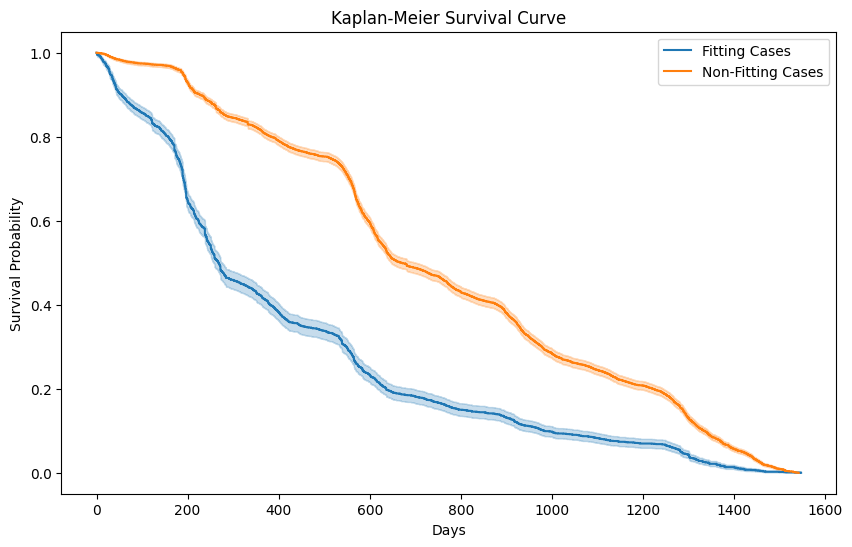

In [7]:
# 将 Duration 列转换为天数
student_times['Duration'] = student_times['Duration'].apply(lambda x: x.days)
student_non_times['Duration'] = student_non_times['Duration'].apply(lambda x: x.days)

# 创建 Kaplan-Meier 分析器
kmf = KaplanMeierFitter()

# 拟合数据并绘制生存曲线
plt.figure(figsize=(10,6))

# 严格遵循先修课程要求的学生
kmf.fit(student_times['Duration'], label='Fitting Cases')
ax = kmf.plot_survival_function()

# 未完成所有先修课程的学生
kmf.fit(student_non_times['Duration'], label='Non-Fitting Cases')
kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()

In [8]:
# 进行 Log-rank 检验
results = logrank_test(student_times['Duration'], student_non_times['Duration'])
print(f"Log-rank 检验的 p 值: {results.p_value}")

Log-rank 检验的 p 值: 2.7104960716465193e-235
